In [12]:
# Convolutional Neural Network (CNN) with the maxtrix of TF-IDF feature.

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

# Load data
df = pd.read_csv('./spam_or_not_spam.csv')
df['email'] = df['email'].fillna('')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF matrix
tfidf_matrix_train = vectorizer.fit_transform(X_train)
tfidf_matrix_test = vectorizer.transform(X_test)

# Convert sparse data to NumPy arrays
X_train = tfidf_matrix_train.toarray()
X_test = tfidf_matrix_test.toarray()

# Reshape the input data for convolutional layers
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define Keras model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Define learning rate
learning_rate = 0.01

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=5)

# Train model with validation split
start_time = time.time()
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
end_time = time.time()

# Evaluate model on test set
_, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print('Test accuracy:', accuracy)
print('Process time for', len(history.history['loss']), 'epochs:', end_time - start_time, 'seconds')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Epoch 1/15
60/60 [==============================] - 84s 1s/step - loss: 0.4821 - accuracy: 0.8495 - val_loss: 0.0604 - val_accuracy: 0.9812
Epoch 2/15
60/60 [==============================] - 79s 1s/step - loss: 0.0450 - accuracy: 0.9844 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 3/15
60/60 [==============================] - 79s 1s/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.0608 - val_accuracy: 0.9750
Epoch 4/15
60/60 [==============================] - 81s 1s/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0489 - val_accuracy: 0.9896
Epoch 5/15
60/60 [==============================] - 79s 1s/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0572 - val_accuracy: 0.9896
Epoch 6/15
60/60 [==============================] - 79s 1s/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0662 - val_accuracy: 0.9854
Epoch 7/15
60/60 [==============================] - 80s 1s/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0999 - val_accuracy: 0.9854
Epoch 8/15
60/60 [==

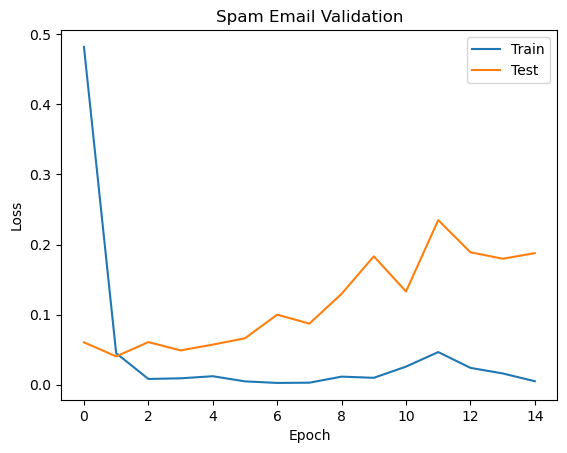

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Spam Email Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# Convolutional Neural Network (CNN) without the maxtrix of TF-IDF feature.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

# Load data
df = pd.read_csv('./spam_or_not_spam.csv')
df['email'] = df['email'].fillna('')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2)

# Tokenize the text data
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text data to numerical form
max_len = 100
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Create the CNN model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Define learning rate
learning_rate = 0.01

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

# Train model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
end_time = time.time()

# Evaluate model on test set
_, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print('Test accuracy:', accuracy)
print('Process time for', len(history.history['loss']), 'epochs:', end_time - start_time, 'seconds')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Epoch 1/15
60/60 [==============================] - 3s 32ms/step - loss: 0.2896 - acc: 0.8859 - val_loss: 0.1823 - val_acc: 0.9500
Epoch 2/15
60/60 [==============================] - 2s 36ms/step - loss: 0.1097 - acc: 0.9833 - val_loss: 0.1698 - val_acc: 0.9563
Epoch 3/15
60/60 [==============================] - 3s 51ms/step - loss: 0.0750 - acc: 0.9932 - val_loss: 0.1790 - val_acc: 0.9583
Epoch 4/15
60/60 [==============================] - 3s 49ms/step - loss: 0.0555 - acc: 0.9964 - val_loss: 0.1966 - val_acc: 0.9583
Epoch 5/15
60/60 [==============================] - 3s 46ms/step - loss: 0.0444 - acc: 0.9964 - val_loss: 0.1840 - val_acc: 0.9563
Epoch 6/15
60/60 [==============================] - 3s 48ms/step - loss: 0.0371 - acc: 0.9964 - val_loss: 0.1841 - val_acc: 0.9563
Epoch 7/15
60/60 [==============================] - 3s 46ms/step - loss: 0.0321 - acc: 0.9964 - val_loss: 0.1851 - val_acc: 0.9583
Epoch 8/15
60/60 [==============================] - 3s 45ms/step - loss: 0.0286 - a

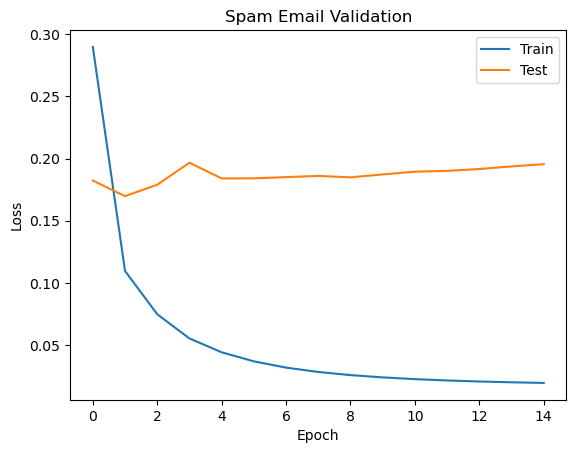

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Spam Email Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [19]:
# Feedforward Neural Network (FNN) with the maxtrix of TF-IDF feature.

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import time

# Load data
df = pd.read_csv('./spam_or_not_spam.csv')
df['email'] = df['email'].fillna('')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF matrix
tfidf_matrix_train = vectorizer.fit_transform(X_train)
tfidf_matrix_test = vectorizer.transform(X_test)

# Convert sparse data to NumPy arrays
X_train = tfidf_matrix_train.toarray()
X_test = tfidf_matrix_test.toarray()

# Define Keras model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Define learning rate
learning_rate = 0.01

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=5)

# Train model with validation split
start_time = time.time()
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
end_time = time.time()

# Evaluate model on test set
_, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

from sklearn.metrics import classification_report, confusion_matrix
print('Test accuracy:', accuracy)
print('Process time for', len(history.history['loss']), 'epochs:', end_time - start_time, 'seconds')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Epoch 1/15
60/60 [==============================] - 3s 44ms/step - loss: 0.4646 - accuracy: 0.8323 - val_loss: 0.2894 - val_accuracy: 0.8708
Epoch 2/15
60/60 [==============================] - 3s 44ms/step - loss: 0.1886 - accuracy: 0.9422 - val_loss: 0.1178 - val_accuracy: 0.9708
Epoch 3/15
60/60 [==============================] - 3s 45ms/step - loss: 0.0711 - accuracy: 0.9906 - val_loss: 0.0671 - val_accuracy: 0.9833
Epoch 4/15
60/60 [==============================] - 3s 46ms/step - loss: 0.0342 - accuracy: 0.9964 - val_loss: 0.0478 - val_accuracy: 0.9854
Epoch 5/15
60/60 [==============================] - 3s 43ms/step - loss: 0.0202 - accuracy: 0.9969 - val_loss: 0.0402 - val_accuracy: 0.9854
Epoch 6/15
60/60 [==============================] - 3s 42ms/step - loss: 0.0127 - accuracy: 0.9979 - val_loss: 0.0380 - val_accuracy: 0.9854
Epoch 7/15
60/60 [==============================] - 3s 43ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.0346 - val_accuracy: 0.9896
Epoch 8/15
60

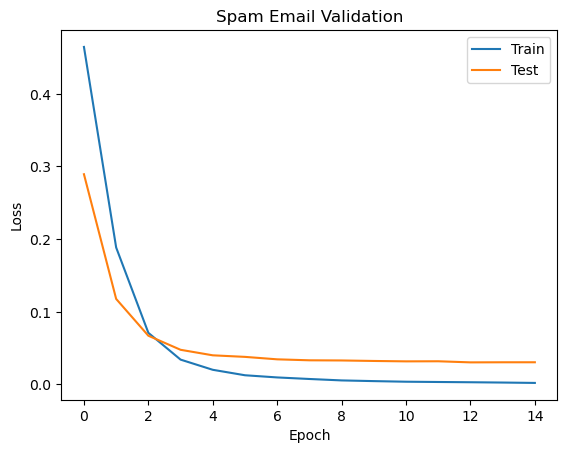

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Spam Email Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# Feedforward Neural Network (FNN) with the maxtrix of TF-IDF feature.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# Load data
df = pd.read_csv('./spam_or_not_spam.csv')
df['email'] = df['email'].fillna('')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2)

# Define vocabulary size
vocab_size = 10000

# Define max sequence length
max_length = 500

# Create tokenization layer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length)

# Define Keras model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_length,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Define learning rate
learning_rate = 0.01

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=5)

# Train model with validation split
start_time = time.time()
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
end_time = time.time()

# Evaluate model on test set
_, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

from sklearn.metrics import classification_report, confusion_matrix
print('Test accuracy:', accuracy)
print('Process time for', len(history.history['loss']), 'epochs:', end_time - start_time, 'seconds')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Epoch 1/15
60/60 [==============================] - 0s 3ms/step - loss: 333.5667 - accuracy: 0.7266 - val_loss: 182.9847 - val_accuracy: 0.7542
Epoch 2/15
60/60 [==============================] - 0s 1ms/step - loss: 145.6209 - accuracy: 0.7828 - val_loss: 136.8859 - val_accuracy: 0.8000
Epoch 3/15
60/60 [==============================] - 0s 1ms/step - loss: 92.2557 - accuracy: 0.7995 - val_loss: 114.2680 - val_accuracy: 0.8125
Epoch 4/15
60/60 [==============================] - 0s 1ms/step - loss: 54.6025 - accuracy: 0.8307 - val_loss: 92.3393 - val_accuracy: 0.8042
Epoch 5/15
60/60 [==============================] - 0s 1ms/step - loss: 36.8030 - accuracy: 0.8557 - val_loss: 85.7663 - val_accuracy: 0.8125
Epoch 6/15
60/60 [==============================] - 0s 1ms/step - loss: 27.1252 - accuracy: 0.8781 - val_loss: 88.2956 - val_accuracy: 0.8292
Epoch 7/15
60/60 [==============================] - 0s 1ms/step - loss: 25.7042 - accuracy: 0.8693 - val_loss: 73.4295 - val_accuracy: 0.8125
E

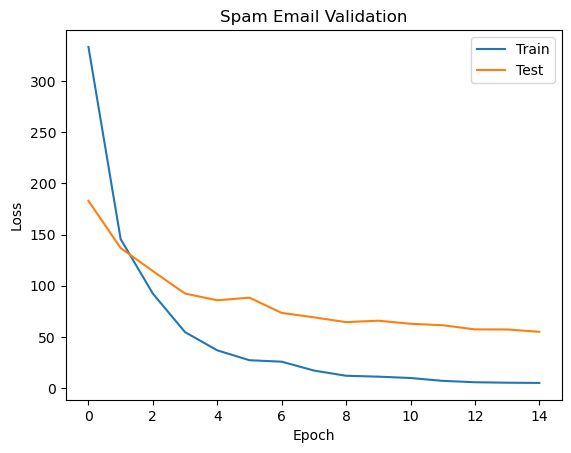

In [3]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Spam Email Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()